C:\Users\91733\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Number of duplicate rows:
723

Information about the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>


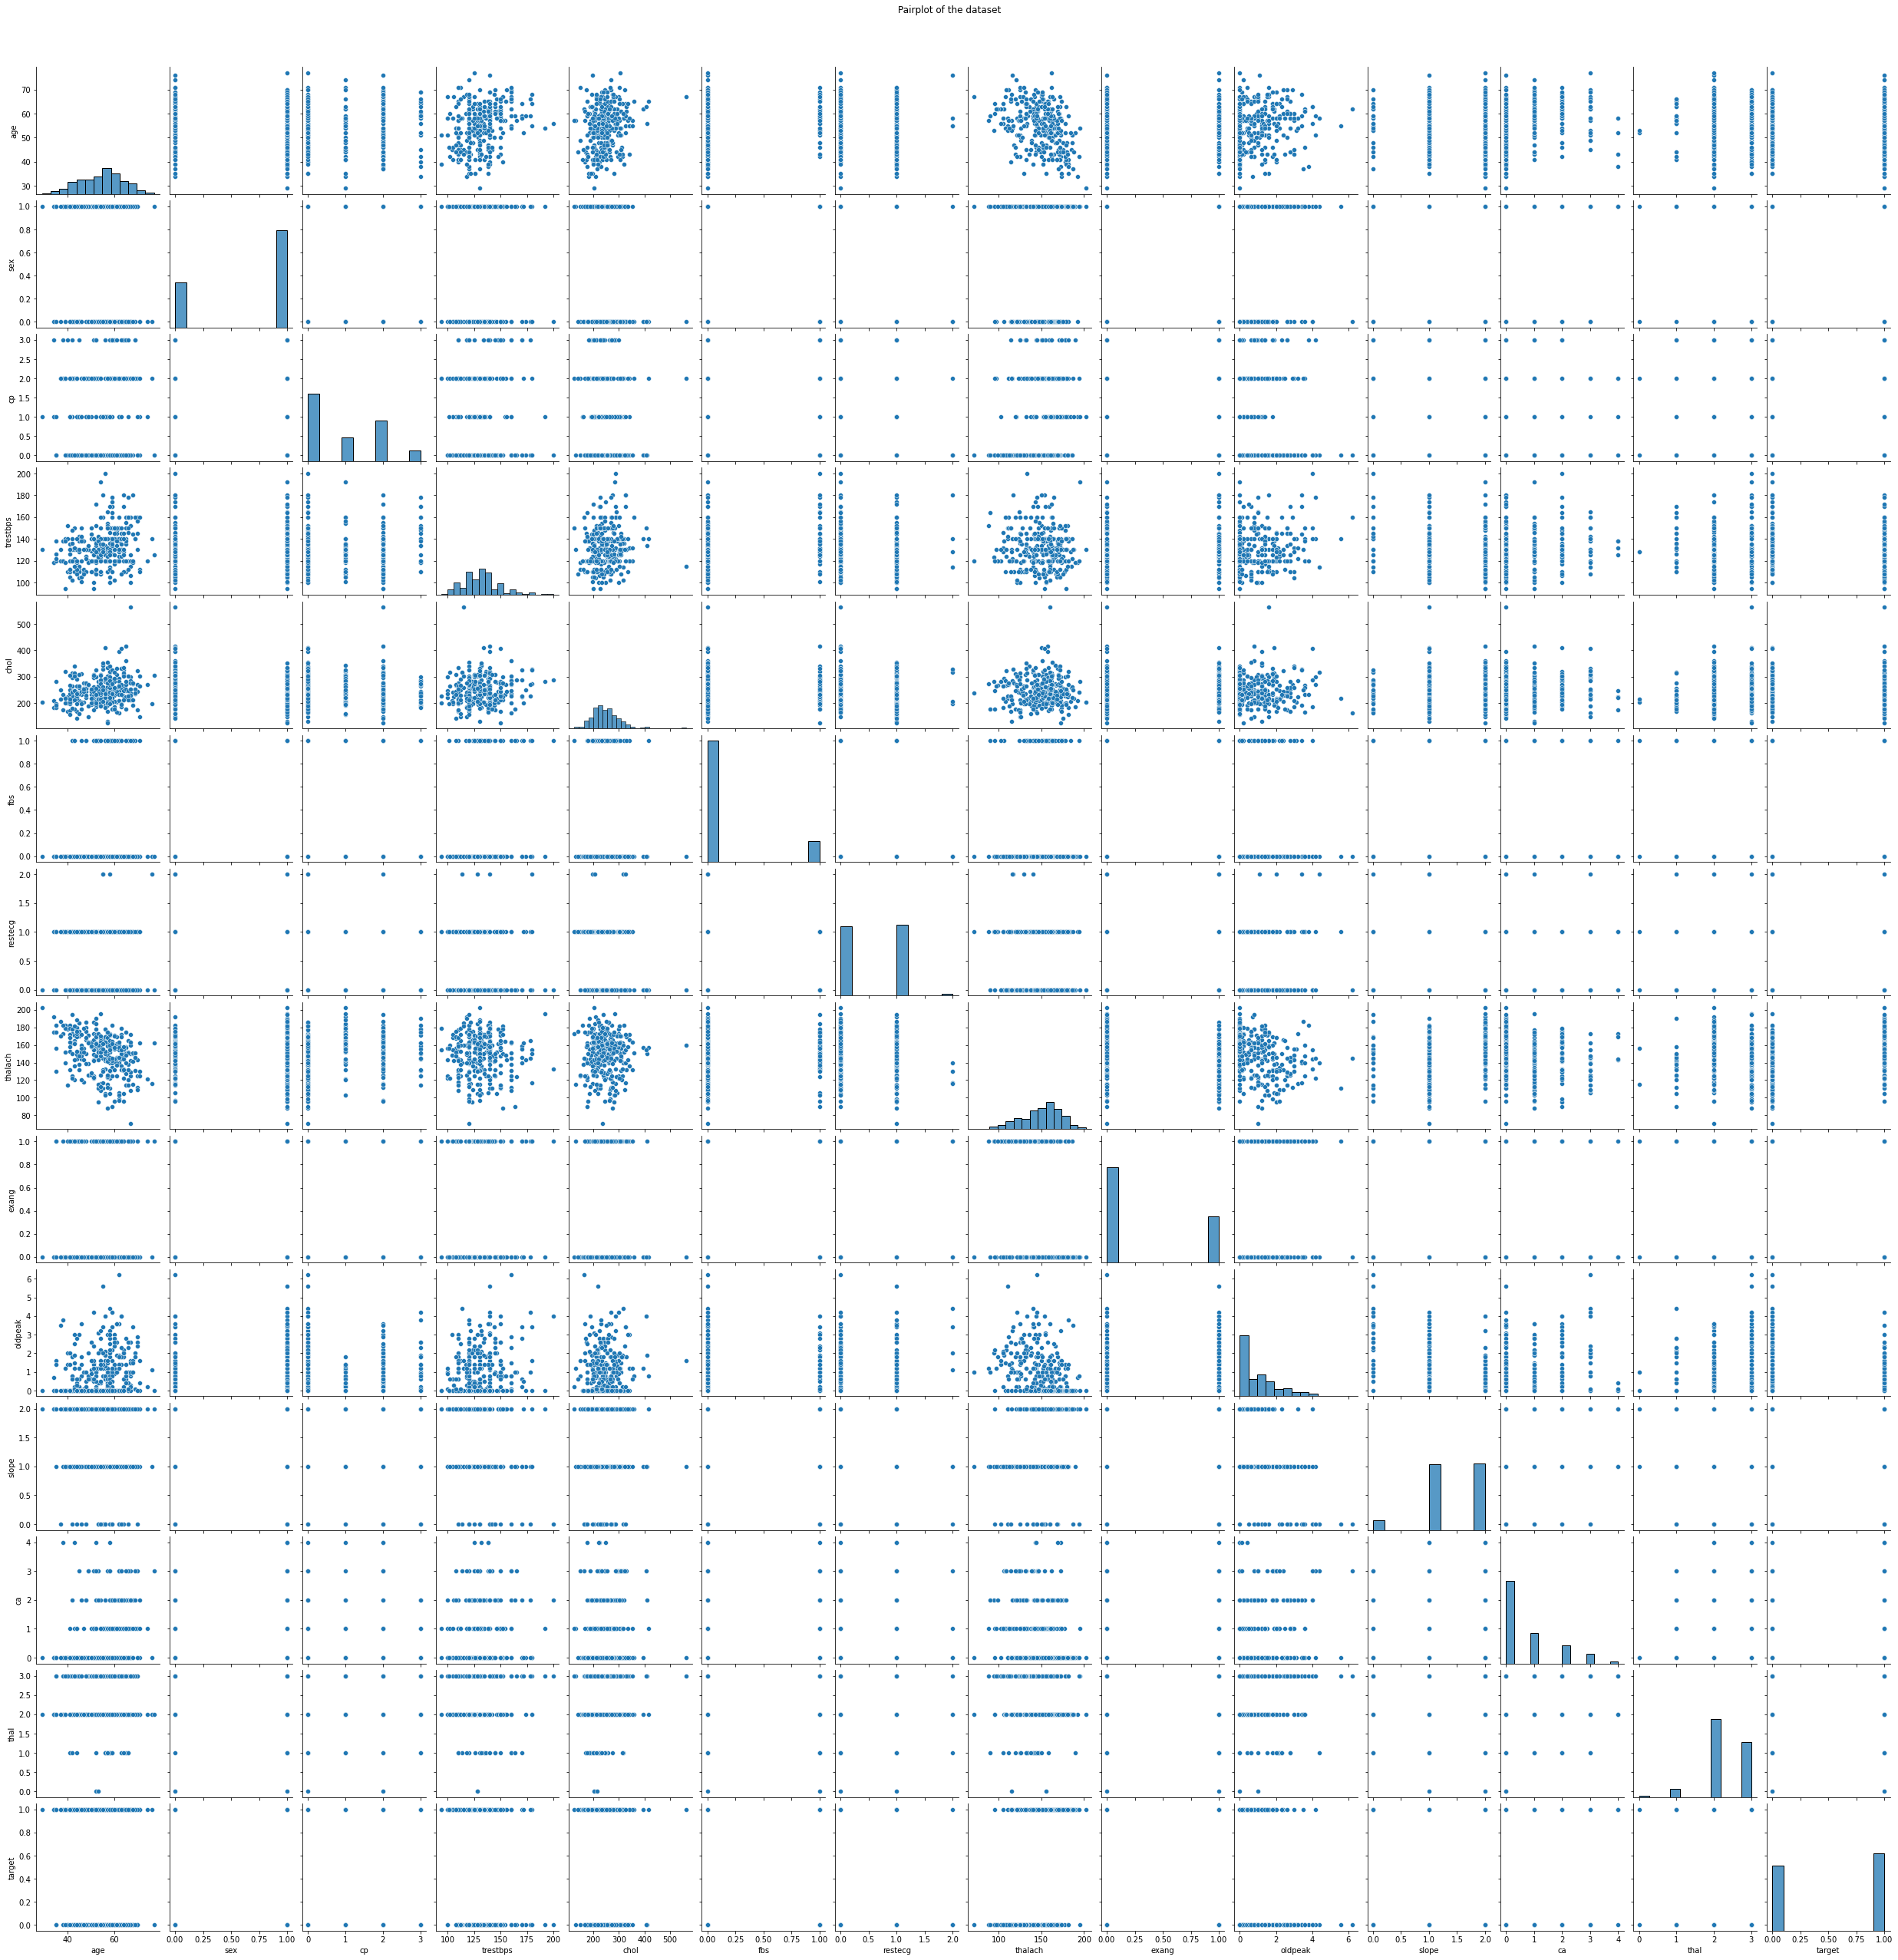


Correlation matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.065317  0.211452 -0.160370  0.0

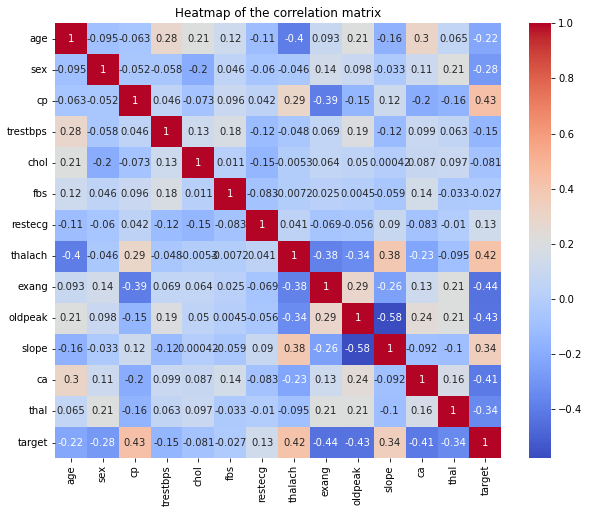

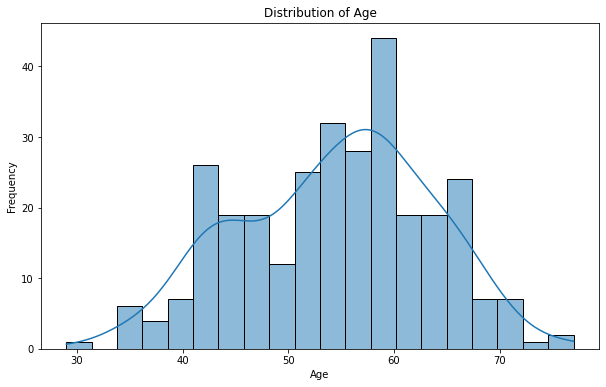

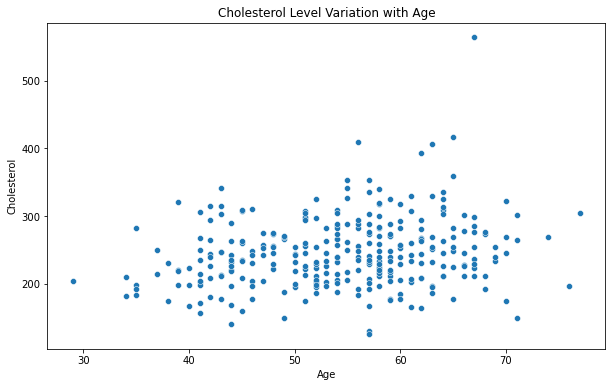

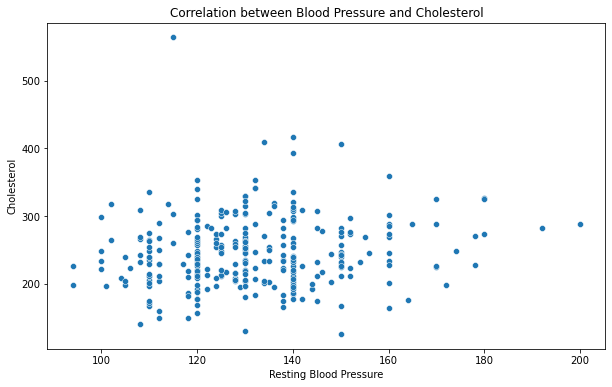

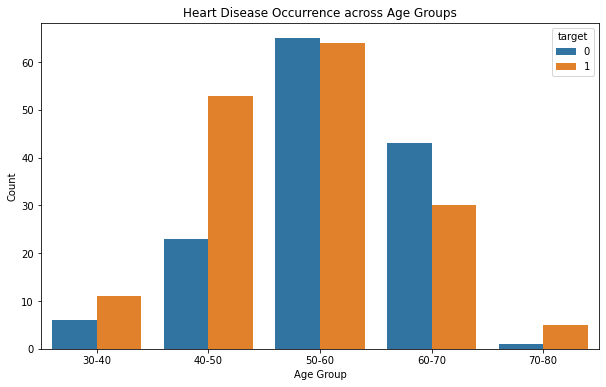

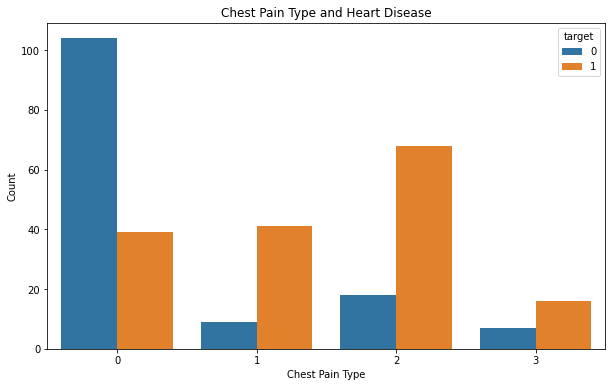


Average age of patients with heart disease: 52.58536585365854
Average age of patients without heart disease: 56.60144927536232


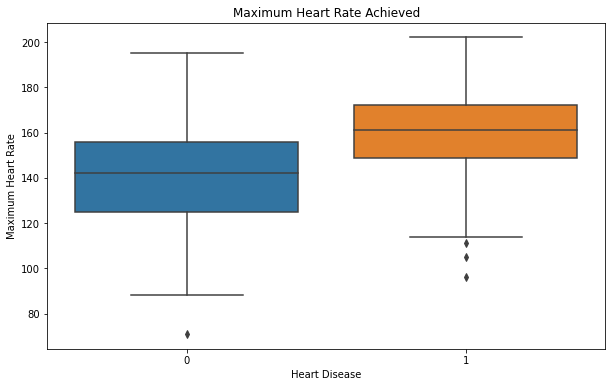

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:\\Users\\91733\\Downloads\\heart.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Handle missing values (if any)
data = data.dropna()

# Check for duplicates
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

# Display the cleaned data
print("\nInformation about the cleaned dataset:")
print(data.info())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())

# Exploratory Data Analysis (EDA)

# Pairplot to understand relationships
sns.pairplot(data)
plt.suptitle("Pairplot of the dataset", y=1.02)
plt.show()

# Correlation matrix
corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of the correlation matrix")
plt.show()

# Question Formulation and Data Visualization

# Question 1: Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Question 2: Cholesterol level variation with age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', data=data)
plt.title('Cholesterol Level Variation with Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

# Question 3: Correlation between blood pressure and cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trestbps', y='chol', data=data)
plt.title('Correlation between Blood Pressure and Cholesterol')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.show()

# Question 4: Distribution of heart disease occurrence across age groups
age_groups = pd.cut(data['age'], bins=[29, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])
data['age_group'] = age_groups
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='target', data=data)
plt.title('Heart Disease Occurrence across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Question 5: Chest pain type and heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data)
plt.title('Chest Pain Type and Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Question 6: Average age of patients with and without heart disease
avg_age_with_disease = data[data['target'] == 1]['age'].mean()
avg_age_without_disease = data[data['target'] == 0]['age'].mean()
print(f'\nAverage age of patients with heart disease: {avg_age_with_disease}')
print(f'Average age of patients without heart disease: {avg_age_without_disease}')

# Question 7: Difference in maximum heart rate achieved
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=data)
plt.title('Maximum Heart Rate Achieved')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()
